#### Dataset Link: https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com

### Importing Libraries

In [1]:
import pandas as pd # for data preprocessing
import itertools # for confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import xgboost
from gensim.models import Word2Vec
import joblib
import os
%matplotlib inline

# If you want to show all the rows of pandas dataframe
# pd.set_option('display.max_rows', None)

In [2]:
data1 = pd.read_csv('./drug review dataset drugs.com/drugsComTrain_raw.tsv',sep='\t')
data1.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [3]:
data2 = pd.read_csv('./drug review dataset drugs.com/drugsComTest_raw.tsv',sep='\t')
data2.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [4]:
data1.info(), data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  objec

(None, None)

In [5]:
data1.shape,data2.shape

((161297, 7), (53766, 7))

In [6]:
data = pd.concat([data1,data2],axis=0)
data.duplicated().sum()

0

In [7]:
data=shuffle(data,random_state=0).reset_index(drop=True)
data.shape

(215063, 7)

In [8]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,4753,Belviq,Weight Loss,"""WARNING...... NEVER STOP THIS MEDICATION COLD...",1.0,"June 18, 2015",52
1,67134,Magnesium hydroxide,Constipation,"""Oh my word! This stuff saved my life. It took...",7.0,"April 10, 2016",21
2,6918,Aluminum chloride hexahydrate,Hyperhidrosis,"""It worked very well for the first 2 weeks wit...",6.0,"August 20, 2016",2
3,164803,Phentermine / topiramate,Weight Loss,"""I&#039;m a 5&#039;11 205lb size 12 former ath...",8.0,"November 27, 2016",24
4,177619,Duloxetine,Generalized Anxiety Disorde,"""I initially took Cymbalta for distonia, which...",10.0,"July 30, 2015",67


In [9]:
if not os.path.exists('./drug review dataset drugs.com'):
    os.makedirs('./drug review dataset drugs.com')
data.to_csv("./drug review dataset drugs.com/DrugsComPatient_raw.csv",index=False)

In [10]:
data.reset_index(drop=True,inplace=True)
data.to_pickle("./drug review dataset drugs.com/DrugsComPatient_raw.pkl")
main = pd.read_pickle("./drug review dataset drugs.com/DrugsComPatient_raw.pkl")
main.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,4753,Belviq,Weight Loss,"""WARNING...... NEVER STOP THIS MEDICATION COLD...",1.0,"June 18, 2015",52
1,67134,Magnesium hydroxide,Constipation,"""Oh my word! This stuff saved my life. It took...",7.0,"April 10, 2016",21
2,6918,Aluminum chloride hexahydrate,Hyperhidrosis,"""It worked very well for the first 2 weeks wit...",6.0,"August 20, 2016",2
3,164803,Phentermine / topiramate,Weight Loss,"""I&#039;m a 5&#039;11 205lb size 12 former ath...",8.0,"November 27, 2016",24
4,177619,Duloxetine,Generalized Anxiety Disorde,"""I initially took Cymbalta for distonia, which...",10.0,"July 30, 2015",67


In [11]:
main_data = pd.read_csv('./drug review dataset drugs.com/DrugsComPatient_raw.csv')
main_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,4753,Belviq,Weight Loss,"""WARNING...... NEVER STOP THIS MEDICATION COLD...",1.0,"June 18, 2015",52
1,67134,Magnesium hydroxide,Constipation,"""Oh my word! This stuff saved my life. It took...",7.0,"April 10, 2016",21
2,6918,Aluminum chloride hexahydrate,Hyperhidrosis,"""It worked very well for the first 2 weeks wit...",6.0,"August 20, 2016",2
3,164803,Phentermine / topiramate,Weight Loss,"""I&#039;m a 5&#039;11 205lb size 12 former ath...",8.0,"November 27, 2016",24
4,177619,Duloxetine,Generalized Anxiety Disorde,"""I initially took Cymbalta for distonia, which...",10.0,"July 30, 2015",67


In [12]:
main_data['condition'].value_counts()

condition
Birth Control                                  38436
Depression                                     12164
Pain                                            8245
Anxiety                                         7812
Acne                                            7435
                                               ...  
Yellow Fever Prophylaxis                           1
Premature Ejaculation                              1
Steroid Responsive Inflammatory Conditions         1
Systemic Candidiasis                               1
92</span> users found this comment helpful.        1
Name: count, Length: 916, dtype: int64

In [13]:
x = main_data[['condition','review']]
x

,condition,review
0,Weight Loss,"""WARNING...... NEVER STOP THIS MEDICATION COLD..."
1,Constipation,"""Oh my word! This stuff saved my life. It took..."
2,Hyperhidrosis,"""It worked very well for the first 2 weeks wit..."
3,Weight Loss,"""I&#039;m a 5&#039;11 205lb size 12 former ath..."
4,Generalized Anxiety Disorde,"""I initially took Cymbalta for distonia, which..."
...,...,...
215058,Depression,"""I am extremely disheartened in reading the ne..."
215059,Weight Loss,"""I started Saxenda today at 184 pounds. I am ..."
215060,ibromyalgia,"""I have been on Lyrica for 1.5 years and it to..."
215061,"Delayed Puberty, Male","""I started taken testo gel 13 months ago. I&#0..."


## Exploratory Data Analysis

In [24]:
x['condition'].unique().shape

(917,)

In [25]:
x['condition'].value_counts()>=1000

condition
Birth Control                                   True
Depression                                      True
Pain                                            True
Anxiety                                         True
Acne                                            True
                                               ...  
Yellow Fever Prophylaxis                       False
Premature Ejaculation                          False
Steroid Responsive Inflammatory Conditions     False
Systemic Candidiasis                           False
92</span> users found this comment helpful.    False
Name: count, Length: 916, dtype: bool

In [26]:
condition_counts = x["condition"].value_counts()
condition_counts

condition
Birth Control                                  38436
Depression                                     12164
Pain                                            8245
Anxiety                                         7812
Acne                                            7435
                                               ...  
Yellow Fever Prophylaxis                           1
Premature Ejaculation                              1
Steroid Responsive Inflammatory Conditions         1
Systemic Candidiasis                               1
92</span> users found this comment helpful.        1
Name: count, Length: 916, dtype: int64

In [27]:
valid_condition = condition_counts[condition_counts>=4000].index
valid_condition

Index(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne',
       'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD'],
      dtype='object', name='condition')

In [28]:
x = x[x['condition'].isin(valid_condition)]
x

,condition,review
0,Weight Loss,"""WARNING...... NEVER STOP THIS MEDICATION COLD..."
3,Weight Loss,"""I&#039;m a 5&#039;11 205lb size 12 former ath..."
8,Acne,"""Amazing! I understand when people say they tr..."
9,ADHD,"""I would have to say wow! It helped me focus d..."
10,Anxiety,"""I had taken this medicine in place of Xanax. ..."
...,...,...
215055,Birth Control,"""I have been on it for three months and have g..."
215057,Pain,"""I take two to three 325mg-5mg tablets daily f..."
215058,Depression,"""I am extremely disheartened in reading the ne..."
215059,Weight Loss,"""I started Saxenda today at 184 pounds. I am ..."


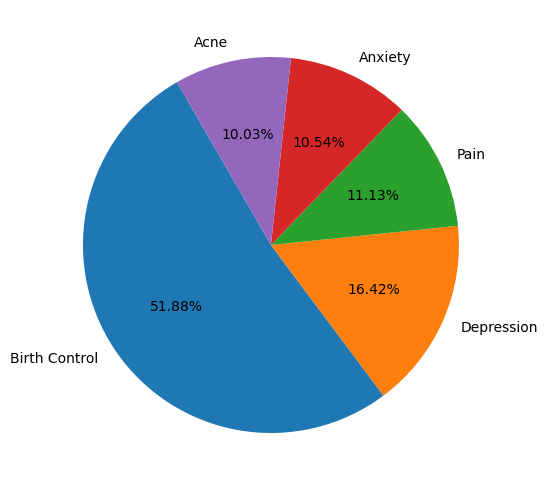

In [29]:
cond_5_ind=x['condition'].value_counts()[:5].index
cond_5_val=x['condition'].value_counts()[:5].values

plt.figure(figsize=(10,5))
plt.pie(x=cond_5_val,labels=cond_5_ind,autopct='%.2f%%',startangle=120)
plt.tight_layout()

In [30]:
x.head()

,condition,review
0,Weight Loss,"""WARNING...... NEVER STOP THIS MEDICATION COLD..."
3,Weight Loss,"""I&#039;m a 5&#039;11 205lb size 12 former ath..."
8,Acne,"""Amazing! I understand when people say they tr..."
9,ADHD,"""I would have to say wow! It helped me focus d..."
10,Anxiety,"""I had taken this medicine in place of Xanax. ..."


In [31]:
# print(' '.join(x['review'][:3]))

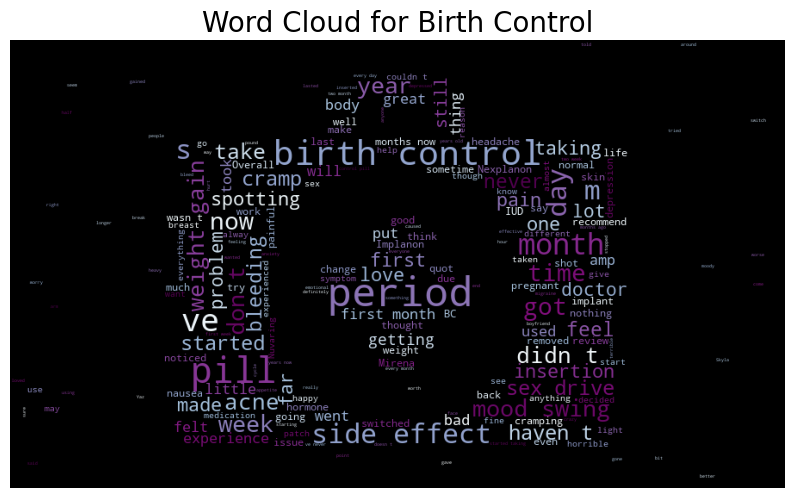

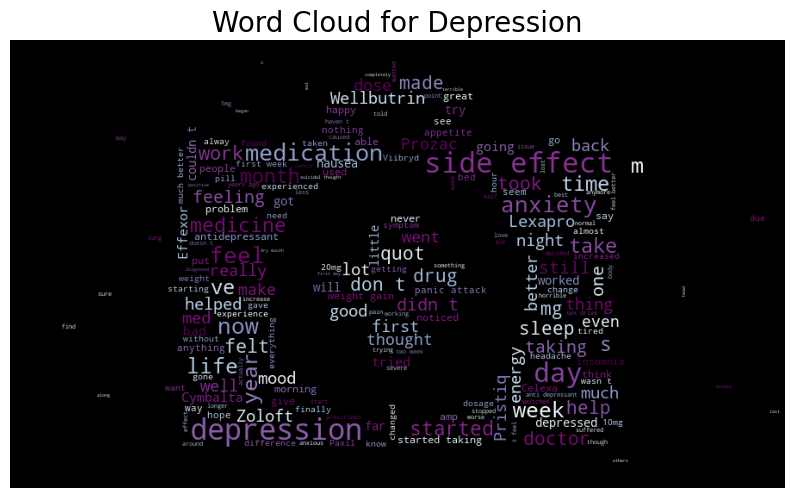

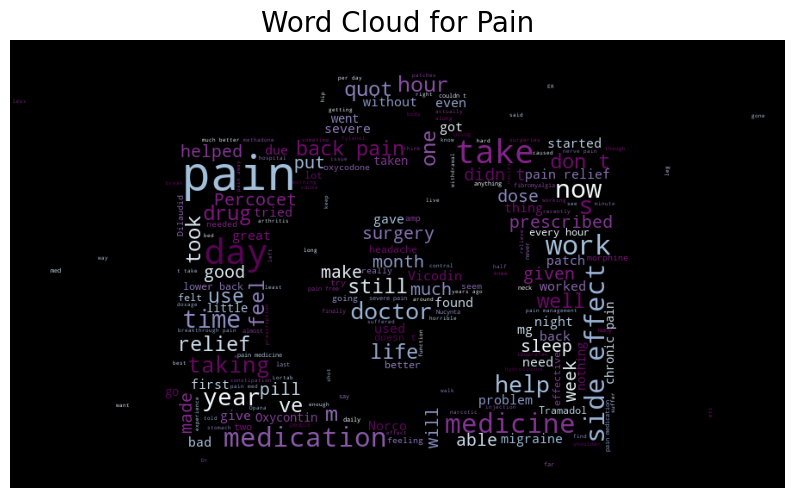

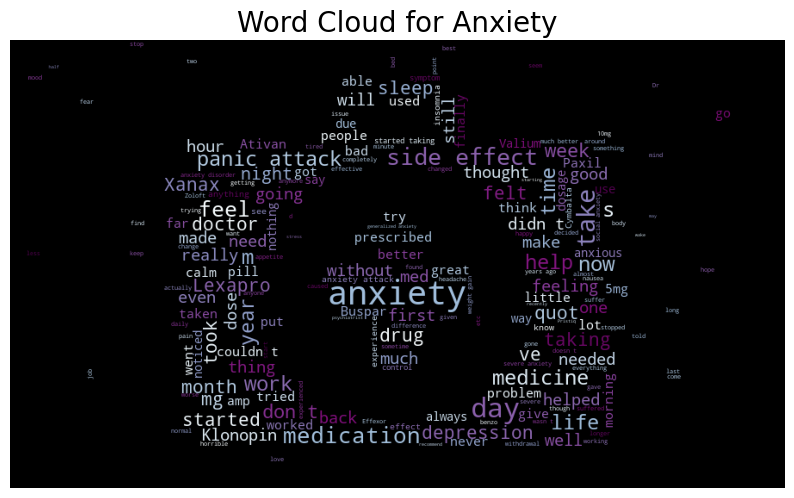

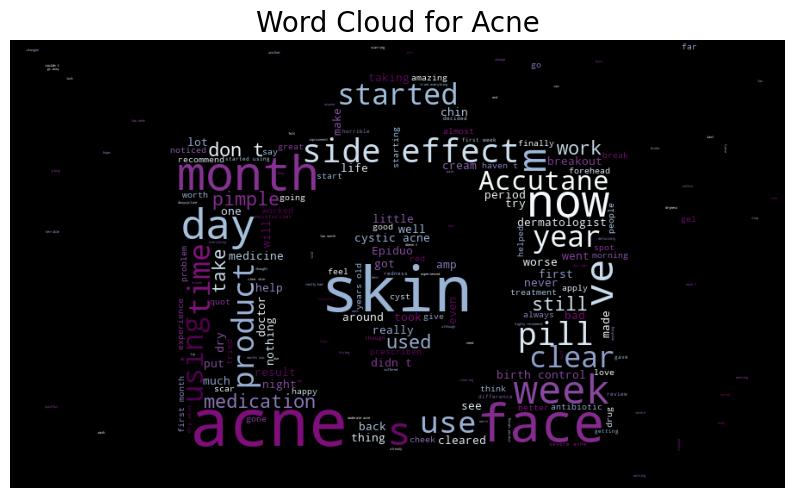

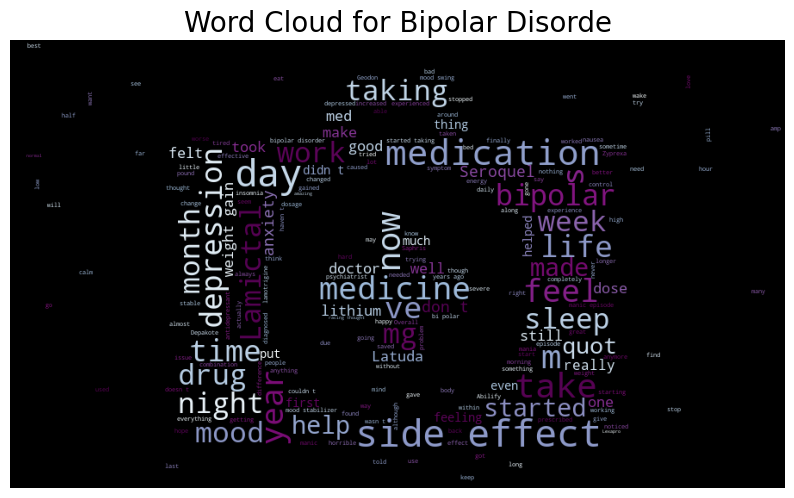

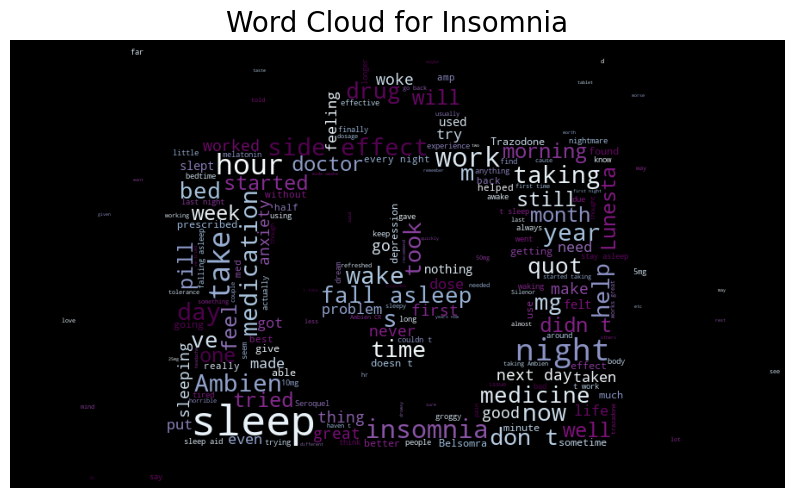

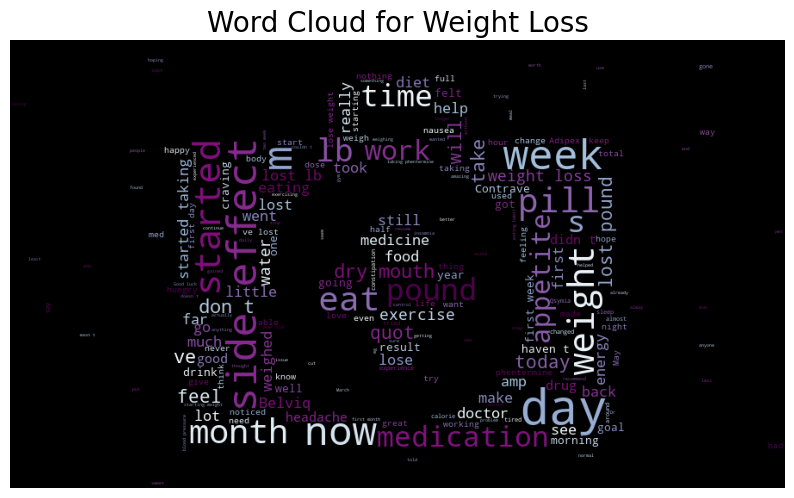

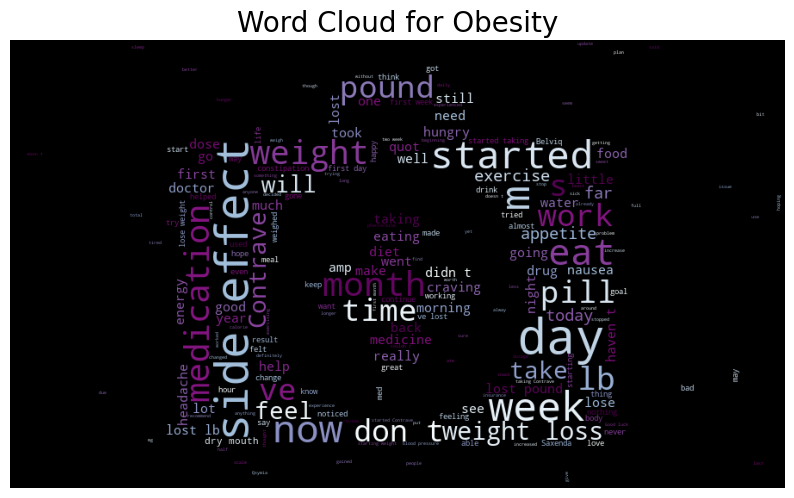

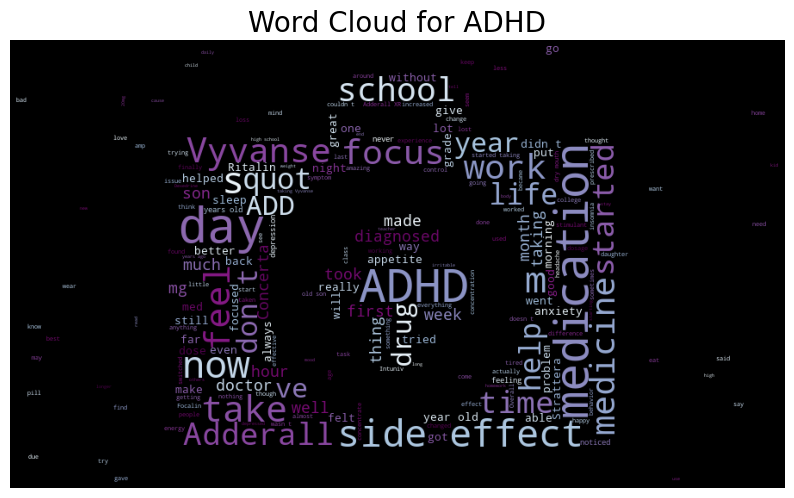

In [32]:
# Segregating dataframe for analyzing individual condition
from wordcloud import WordCloud
import PIL
from IPython.display import Image
img_mask = PIL.Image.open('./Med1.jpg')

img_mask = np.array(img_mask)
# display(img_mask)
for condition in valid_condition:
    plt.figure(figsize=(10,8))
    wc = WordCloud(max_words=200, 
                   colormap = 'BuPu_r', mask=img_mask, background_color='black').generate(' '.join(x[x['condition']==condition]['review']))
    plt.axis('off')
    plt.imshow(wc)
    plt.title(f"Word Cloud for {condition}",fontsize=20)

## Data Preprocessing

In [33]:
x[x['review'].str.contains('#')].reset_index(drop=True).loc[0,"review"]

'"WARNING...... NEVER STOP THIS MEDICATION COLD TURKEY.  The side effects are extreme! I was in Belviq for 4 months and began having side effects of nausea, headaches, and overall just a weird feeling. I stopped the medication to see if that&#039;s what the cause was. A few days later, I had severe muscle tremors and spasms, loss of coordination, sweating, shivering, shaking, headaches, and a rapid heart rate. I thought I was having a stroke. Went to the ER. My blood pressure was 210/150! Unfortunately, every time I would have a withdrawal from this medication I would experience these symptoms. It took 2 1/2 weeks to get this medication out of my body. I was confused a lot and had severe depression. I had all of the signs of serotonin syndrome."'

In [34]:
if '#' in x[x['review'].str.contains('#')].reset_index(drop=True).loc[0,"review"]:
    print("Yes")

Yes


In [35]:
for i, col in enumerate(x.columns):
    x.loc[:,col] = x.loc[:,col].str.replace('"','')
x[x['review'].str.contains('#')].reset_index(drop=True).loc[0,"review"]

'WARNING...... NEVER STOP THIS MEDICATION COLD TURKEY.  The side effects are extreme! I was in Belviq for 4 months and began having side effects of nausea, headaches, and overall just a weird feeling. I stopped the medication to see if that&#039;s what the cause was. A few days later, I had severe muscle tremors and spasms, loss of coordination, sweating, shivering, shaking, headaches, and a rapid heart rate. I thought I was having a stroke. Went to the ER. My blood pressure was 210/150! Unfortunately, every time I would have a withdrawal from this medication I would experience these symptoms. It took 2 1/2 weeks to get this medication out of my body. I was confused a lot and had severe depression. I had all of the signs of serotonin syndrome.'

In [36]:
# To set the width of the column to maximum
# pd.set_option('display.max_colwidth', -1)

In [37]:
x.head()

,condition,review
0,Weight Loss,WARNING...... NEVER STOP THIS MEDICATION COLD ...
3,Weight Loss,I&#039;m a 5&#039;11 205lb size 12 former athl...
8,Acne,Amazing! I understand when people say they tri...
9,ADHD,I would have to say wow! It helped me focus du...
10,Anxiety,I had taken this medicine in place of Xanax. ...


### Stopwords

What are stopwords?

Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document.

For example, in the English language, words like 'a', 'the', 'is', 'an', 'in', 'on', 'at', 'to', 'of', etc.

In [38]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
len(stopwords),stopwords

(179,
 ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further',

### Lemmatization

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

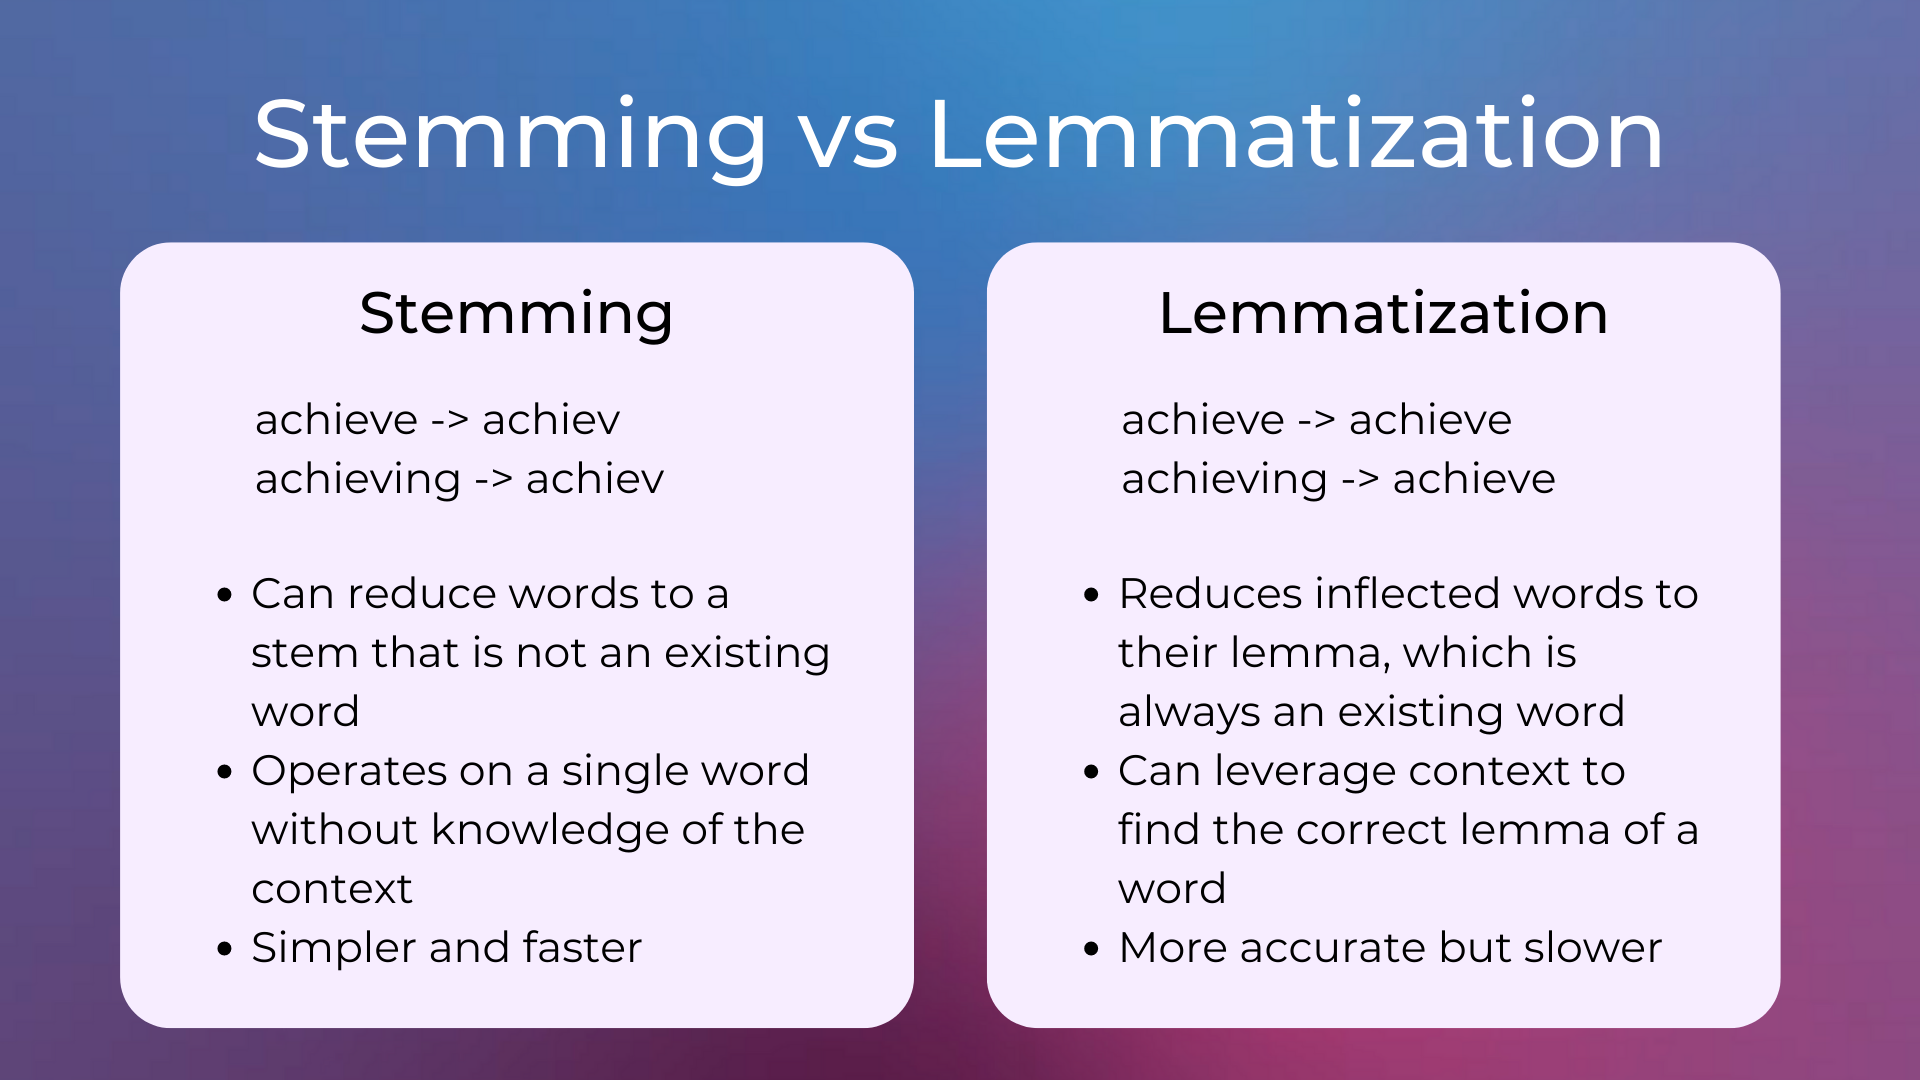

In [39]:
from IPython.display import Image, display
img=Image(filename='./stem_vs_lemma.png')
display(img)

In [40]:
# from nltk.stem import WordNetLemmatizer
# from nltk.tag import pos_tag

# lemmatizer = WordNetLemmatizer()

# def get_tag(tag):
#     if tag.startswith('J'):
#         return 'a'
#     elif tag.startswith(('V','N','R')):
#         return tag.lower()[0]
#     else:
#         return None
    
# def lemmatize_word(words):
#     pos = pos_tag(words)
#     lemmatized_words = []
#     for word, tag in pos:
#         pos = get_tag(tag)
#         if pos:
#             lemmatized_words.append(lemmatizer.lemmatize(word,pos))
#         else:
#             lemmatized_words.append(word)
#     return lemmatized_words

In [41]:
from bs4 import BeautifulSoup
import re
import string

punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [42]:
punct = '!%&()*,./:;<=>@[\\]^`{|}~'
print(punct)

!%&()*,./:;<=>@[\]^`{|}~


In [43]:
# test = re.sub("[^a-zA-Z]"," ", "yahhaha2323kdkdkd")
# test

In [44]:
# test = word_tokenize("mkmk          uouo jjjjj".lower())
# test

In [45]:
"kskks? kksks".split()

['kskks?', 'kksks']

In [46]:
from nltk.tokenize import word_tokenize
word_tokenize("kdkdkdk?``")

['kdkdkdk', '?', '``']

In [47]:
re.sub(f"[{punct}]"," ", "kdkdkdk``")

'kdkdkdk  '

In [48]:
"LJ".startswith(('K','L'))

True

In [49]:
tx = "5'7\""
print(tx)

5'7"


In [50]:
print(re.sub("[^0-9a-zA-Z #+-_$'\"]","", "5'7\""))

5'7"


In [51]:
def clean_words(raw_review):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    # 2. Remove symbols
    review_text = re.sub(f"[{punct}]"," ", review_text)
    review_text = re.sub("[^0-9a-zA-Z #+-_$'\"]","", review_text)
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    # 4. Remove stopwords
    words = [w for w in words if w not in stopwords]
    # # 5. Lemmatize words
    # words = [lemmatizer.lemmatize(w) for w in words]
    # 6. Return the cleaned words
    return words

In [52]:
x.head()

,condition,review
0,Weight Loss,WARNING...... NEVER STOP THIS MEDICATION COLD ...
3,Weight Loss,I&#039;m a 5&#039;11 205lb size 12 former athl...
8,Acne,Amazing! I understand when people say they tri...
9,ADHD,I would have to say wow! It helped me focus du...
10,Anxiety,I had taken this medicine in place of Xanax. ...


In [53]:
x_review = x['review'].apply(clean_words)
x_review.head()

C:\Users\micha\AppData\Local\Temp\ipykernel_50840\4216696696.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review,'html.parser').get_text()


0     [warning, never, stop, medication, cold, turke...
3     [i'm, 5'11, 205lb, size, 12, former, athlete, ...
8     [amazing, understand, people, say, tried, ever...
9     [would, say, wow, helped, focus, school, used,...
10    [taken, medicine, place, xanax, found, tranxen...
Name: review, dtype: object

In [54]:
type(x_review),x_review

(pandas.core.series.Series,
 0         [warning, never, stop, medication, cold, turke...
 3         [i'm, 5'11, 205lb, size, 12, former, athlete, ...
 8         [amazing, understand, people, say, tried, ever...
 9         [would, say, wow, helped, focus, school, used,...
 10        [taken, medicine, place, xanax, found, tranxen...
                                 ...                        
 215055    [three, months, gained, 10, pounds, regular, g...
 215057    [take, two, three, 325mg-5mg, tablets, daily, ...
 215058    [extremely, disheartened, reading, negative, r...
 215059    [started, saxenda, today, 184, pounds, 5'7", 4...
 215062    [32, cancer, four, times, realized, serious, a...
 Name: review, Length: 98723, dtype: object)

In [55]:
x_review.get(215059)

['started',
 'saxenda',
 'today',
 '184',
 'pounds',
 '5\'7"',
 '48',
 'years',
 'old',
 'goal',
 'weight',
 '150',
 'pounds',
 'far',
 'side',
 'effects',
 'day',
 '1',
 'sure',
 'quickly',
 'kick',
 'looking',
 'forward',
 'journey',
 'hope',
 'amazing',
 'results',
 'hard',
 'work',
 'determination',
 'reach',
 'goal',
 'help',
 'saxenda']

In [56]:
x.loc[215059,'review']

'I started Saxenda today at 184 pounds.  I am 5&#039;7&quot; and 48 years old.  My goal weight is 150 pounds.  So far I haven&#039;t had any side effects, but then again this is only day 1 so I am not sure how quickly those kick in.  I am looking forward to this journey and hope to have amazing results from hard work and determination to reach my goal with the help of Saxenda.'

In [57]:
text = "I started Saxenda today at 184 pounds.  I am 5&#039;7&quot; and 48 years old.  My goal weight is 150 pounds.  So far I haven&#039;t had any side effects, but then again this is only day 1 so I am not sure how quickly those kick in.  I am looking forward to this journey and hope to have amazing results from hard work and determination to reach my goal with the help of Saxenda."
review_text = BeautifulSoup(text,'html.parser').get_text()
print(review_text)
review_text = re.sub(f"[{punct}]"," ", review_text)
print(review_text)
review_text = re.sub("[^0-9a-zA-Z #+-_'\"$]","", review_text)
print(review_text)
words = review_text.lower().split()
print(words)
words = [w for w in words if w not in stopwords]
print(words)
print(words[5])

I started Saxenda today at 184 pounds.  I am 5'7" and 48 years old.  My goal weight is 150 pounds.  So far I haven't had any side effects, but then again this is only day 1 so I am not sure how quickly those kick in.  I am looking forward to this journey and hope to have amazing results from hard work and determination to reach my goal with the help of Saxenda.
I started Saxenda today at 184 pounds   I am 5'7" and 48 years old   My goal weight is 150 pounds   So far I haven't had any side effects  but then again this is only day 1 so I am not sure how quickly those kick in   I am looking forward to this journey and hope to have amazing results from hard work and determination to reach my goal with the help of Saxenda 
I started Saxenda today at 184 pounds   I am 5'7" and 48 years old   My goal weight is 150 pounds   So far I haven't had any side effects  but then again this is only day 1 so I am not sure how quickly those kick in   I am looking forward to this journey and hope to have 

## Word2Vec

In [68]:
word2vec = Word2Vec(sentences=x_review, vector_size=250, window=5, min_count=1, workers=5)
if not os.path.exists('./Word Embedding'):
    os.makedirs('./Word Embedding')
word2vec.save("./Word Embedding/word2vec.model")

In [48]:
# Similarity in word2vec
vector_57 = word2vec.wv["5'7\""]
vector_56 = word2vec.wv["5'6\""]

print("Vektor for '5'7\":", vector_57)
print("Vektor for '5'6\":", vector_56)

# Menghitung kesamaan kosinus antara '5'7"' dan '5'6"'
similarity = word2vec.wv.similarity("5'7\"", "5'6\"")
print("Cosine similarity between '5'7\" dan '5'6\" is:", similarity)

Vektor for '5'7": [-1.20795779e-01 -9.03342888e-02  3.54054302e-01  6.08026348e-02
 -4.83426452e-01 -2.99109876e-01  3.20878178e-01  1.84939831e-01
  2.65215021e-02  4.95307744e-02 -5.97442567e-01  1.67663008e-01
 -3.03619672e-02  6.32604897e-01 -1.70640960e-01  7.94809908e-02
 -2.21318660e-05 -7.65292868e-02 -2.25748464e-01  1.46857332e-02
  3.70867640e-01  2.70588785e-01  2.64207095e-01 -7.42028281e-02
 -2.15198994e-01 -4.30105090e-01  5.54278910e-01  1.09366111e-01
  1.22579178e-02  4.92475152e-01 -1.06871381e-01 -4.06610407e-02
 -1.93189010e-02  1.16423912e-01  2.76589245e-01 -2.43157074e-01
 -2.20256776e-01  4.09339964e-02  1.03420563e-01  1.17870621e-01
 -4.06388998e-01  3.38887632e-01 -9.19305459e-02  7.30571747e-02
 -1.24503873e-01  1.95751235e-01  5.90577535e-02 -9.05053243e-02
 -2.18672648e-01  4.19790894e-01  4.95803282e-02  1.73413023e-01
 -1.61981016e-01  2.02444881e-01  2.43138403e-01 -1.96788430e-01
  3.75750631e-01  1.42707720e-01  1.06171042e-01  5.83657138e-02
 -1.658

In [49]:
word2vec.wv['good'], word2vec.wv['bad']

(array([ 3.15577000e-01, -2.18961641e-01,  7.42587507e-01,  1.24193752e+00,
        -9.43103969e-01, -7.39525676e-01,  3.30037862e-01, -6.30655050e-01,
         6.07876539e-01, -1.04988718e+00,  1.03630948e+00, -4.42514211e-01,
        -1.70006406e+00, -3.07493716e-01,  5.32940567e-01, -1.24022436e+00,
         1.51441348e+00,  9.48123872e-01,  7.12003767e-01, -1.30197465e-01,
         1.60912812e+00, -2.83453822e-01,  1.00939870e+00, -9.24747407e-01,
        -8.23520958e-01,  2.09449738e-01, -7.04589009e-01, -9.02243614e-01,
         1.32052684e+00, -1.90136340e-02, -1.41730547e+00, -9.02062058e-01,
         2.39078665e+00, -4.71474499e-01,  1.23770750e+00, -1.51786655e-01,
         1.21477211e+00,  6.47544324e-01,  2.44144082e+00,  4.91239548e-01,
        -1.97558165e-01, -1.06290078e+00,  3.74966592e-01,  1.63532281e+00,
        -1.12027478e+00,  4.58352298e-01,  7.78441668e-01,  1.42275274e-01,
        -6.30167723e-01, -9.21970308e-01,  1.94735825e-01,  1.55089462e+00,
        -1.4

In [50]:
def get_averaged_vector(review):
    word_vec = []
    for word in review:
        if word in word2vec.wv:
            word_vec.append(word2vec.wv[word])
    if len(word_vec) == 0:
        return np.zeros(word2vec.vector_size)
    return sum(word_vec) / len(word_vec)

get_averaged_vector(['good','bad'])

array([ 5.35790145e-01, -1.99626878e-01,  3.00295115e-01,  4.17899311e-01,
       -7.00476229e-01, -3.03725302e-02,  6.90374136e-01, -3.27854514e-01,
        6.24221712e-02, -6.55383945e-01,  1.01524949e+00, -7.64424652e-02,
       -1.48877168e+00, -4.48435783e-01,  3.27194780e-02, -5.62798262e-01,
        1.02066684e+00,  1.09695768e+00,  5.67553163e-01, -2.18477741e-01,
        8.23718786e-01,  9.63242799e-02,  6.65376186e-01, -2.22946405e-01,
       -6.30964875e-01,  5.41726887e-01, -2.76058555e-01, -4.56289113e-01,
        1.84019399e+00, -5.19755900e-01, -1.17394054e+00, -1.62661761e-01,
        1.88022339e+00, -7.79259086e-01,  1.25131869e+00, -6.16526455e-02,
        1.02759790e+00,  4.06796753e-01,  2.81102180e+00,  1.34191066e-01,
       -2.84437448e-01, -6.60655975e-01,  6.71930492e-01,  2.94020772e-01,
       -2.47588277e-01,  9.27068233e-01, -3.36936593e-01,  4.71214093e-02,
       -1.35286495e-01, -7.99550653e-01,  2.26664051e-01,  8.98033142e-01,
       -3.16931605e-01, -

In [51]:
# def document_vector(doc, model):
#     # Retrieve the vector of words in the Word2Vec model
#     doc = [word for word in doc if word in model.wv]
#     # If no words are in the Word2Vec model, return a vector of zeros
#     if len(doc) == 0:
#         return np.zeros(model.vector_size)
#     return np.mean(model.wv[doc], axis=0)

## Creating Features and Target Variable

In [52]:
x_feat = np.array([get_averaged_vector(review) for review in x_review])
y=x['condition']
x_feat.shape,y.shape

((98723, 250), (98723,))

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
# joblib.dump(le,'./label_encoder_w2v.pkl')
y, len(le.classes_),le.classes_

(array([9, 9, 1, ..., 5, 9, 2]),
 10,
 array(['ADHD', 'Acne', 'Anxiety', 'Bipolar Disorde', 'Birth Control',
        'Depression', 'Insomnia', 'Obesity', 'Pain', 'Weight Loss'],
       dtype=object))

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_feat,y,test_size=0.2,random_state=0,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((78978, 250), (19745, 250), (78978,), (19745,))

## Modeling

In [55]:
if not os.path.exists("./Models"):
    os.mkdir("./Models")

### K-Nearest Neighbors

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9167890605216511

Classification report:
              precision    recall  f1-score   support

           0      0.933     0.892     0.912       902
           1      0.973     0.956     0.965      1487
           2      0.849     0.794     0.821      1563
           3      0.890     0.768     0.825      1121
           4      0.986     0.994     0.990      7687
           5      0.789     0.898     0.840      2433
           6      0.916     0.855     0.885       981
           7      0.810     0.795     0.803       951
           8      0.945     0.942     0.944      1649
           9      0.811     0.824     0.817       971

    accuracy                          0.917     19745
   macro avg      0.890     0.872     0.880     19745
weighted avg      0.918     0.917     0.917     19745




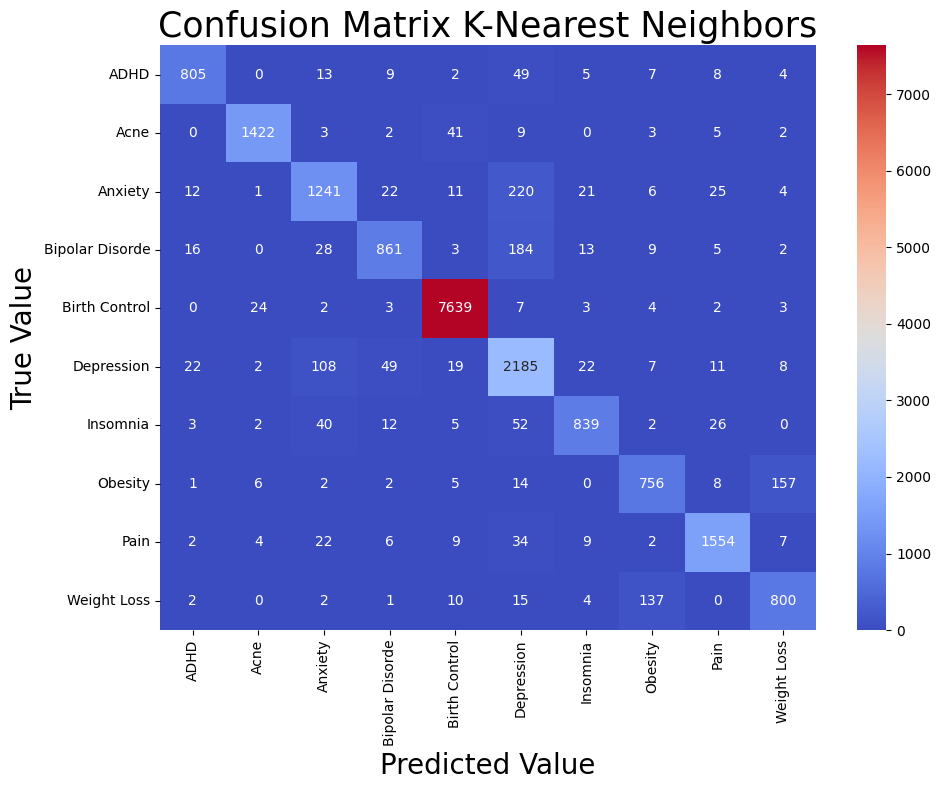

In [56]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', leaf_size=30, p=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

joblib.dump(knn, './Models/knn_w2v_model.pkl')

print(y_pred)
print(y_test)
print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix K-Nearest Neighbors",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### Support Vector Machines

[4 5 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.8446695365915422

Classification report:
              precision    recall  f1-score   support

           0      0.854     0.846     0.850       902
           1      0.916     0.874     0.894      1487
           2      0.728     0.645     0.684      1563
           3      0.749     0.657     0.700      1121
           4      0.965     0.977     0.971      7687
           5      0.683     0.790     0.732      2433
           6      0.823     0.805     0.814       981
           7      0.611     0.592     0.601       951
           8      0.906     0.903     0.904      1649
           9      0.631     0.613     0.622       971

    accuracy                          0.845     19745
   macro avg      0.787     0.770     0.777     19745
weighted avg      0.845     0.845     0.844     19745




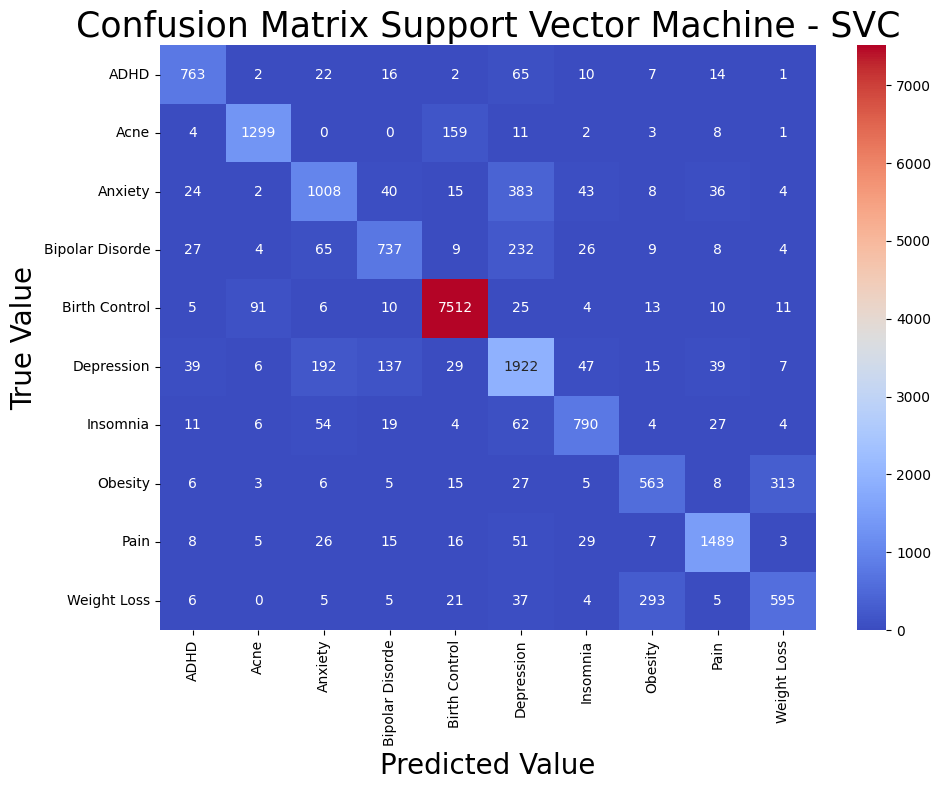

In [84]:
svc = SVC(kernel='linear', C=10)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

joblib.dump(svc, './Models/svc_w2v_model.pkl')

print(y_pred)
print(y_test)
print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix Support Vector Machine - SVC",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()


### Passive Aggresive Classifier

[4 5 8 ... 4 4 0]
[4 2 8 ... 4 4 0]
Accuracy score: 0.8299822739934161

Classification report:
              precision    recall  f1-score   support

           0      0.813     0.867     0.839       902
           1      0.940     0.849     0.892      1487
           2      0.713     0.660     0.685      1563
           3      0.735     0.627     0.677      1121
           4      0.961     0.977     0.969      7687
           5      0.718     0.733     0.725      2433
           6      0.825     0.819     0.822       981
           7      0.555     0.239     0.334       951
           8      0.881     0.904     0.892      1649
           9      0.479     0.822     0.605       971

    accuracy                          0.830     19745
   macro avg      0.762     0.749     0.744     19745
weighted avg      0.834     0.830     0.826     19745




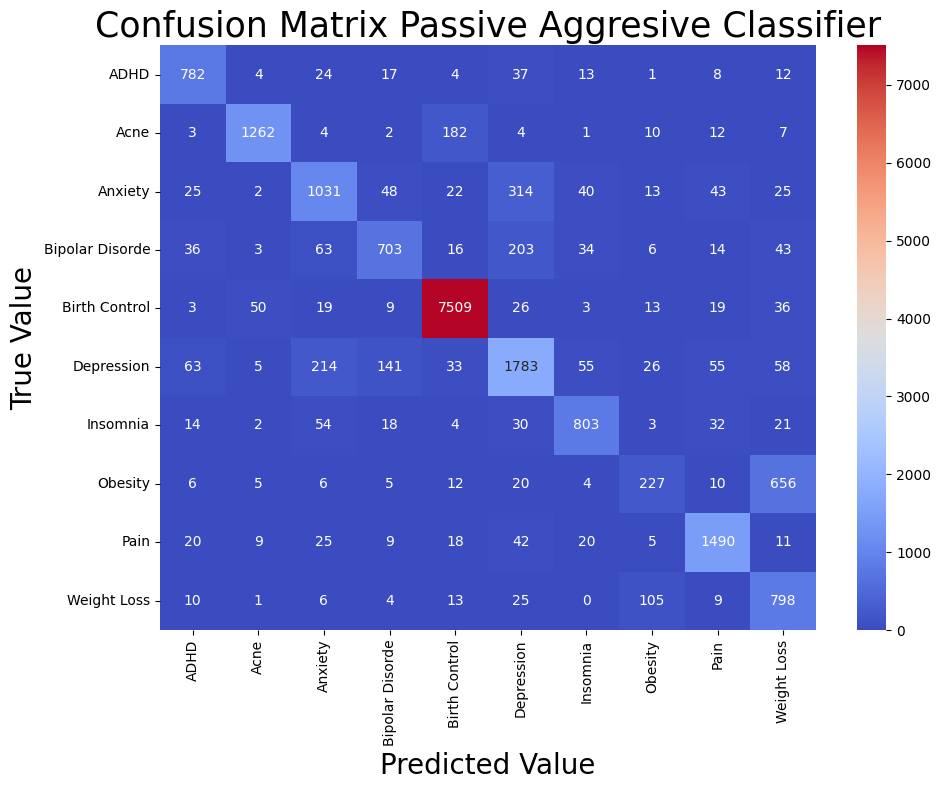

In [58]:
pac = PassiveAggressiveClassifier(max_iter=1000, C=0.01, random_state=0)
pac.fit(x_train,y_train)
y_pred = pac.predict(x_test)

joblib.dump(pac,"./Models/pac_w2v_model.pkl")

print(y_pred)
print(y_test)
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix Passive Aggresive Classifier",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### Logistic Regression

[4 5 8 ... 4 4 0]
[4 2 8 ... 4 4 0]
Accuracy score: 0.837680425424158

Classification report:
              precision    recall  f1-score   support

           0      0.861     0.835     0.847       902
           1      0.916     0.872     0.893      1487
           2      0.722     0.639     0.678      1563
           3      0.757     0.638     0.692      1121
           4      0.965     0.975     0.970      7687
           5      0.672     0.780     0.722      2433
           6      0.814     0.808     0.811       981
           7      0.582     0.559     0.571       951
           8      0.887     0.896     0.891      1649
           9      0.592     0.601     0.597       971

    accuracy                          0.838     19745
   macro avg      0.777     0.760     0.767     19745
weighted avg      0.839     0.838     0.837     19745




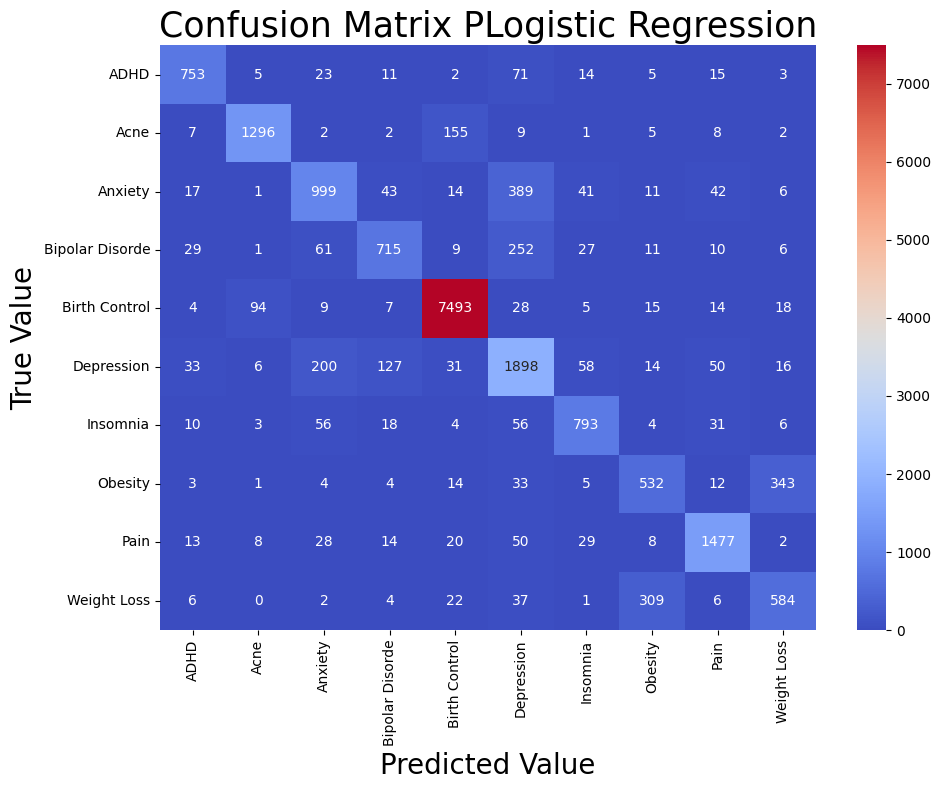

In [59]:
lr = LogisticRegression(max_iter=1000, C=1)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

joblib.dump(lr,"./Models/lr_w2v_model.pkl")

print(y_pred)
print(y_test)
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix PLogistic Regression",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### Random Forest

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]
Accuracy score: 0.9193213471765004

Classification report:
              precision    recall  f1-score   support

           0      0.953     0.886     0.918       902
           1      0.975     0.954     0.964      1487
           2      0.864     0.790     0.825      1563
           3      0.936     0.765     0.842      1121
           4      0.979     0.994     0.987      7687
           5      0.781     0.920     0.845      2433
           6      0.908     0.844     0.875       981
           7      0.845     0.812     0.828       951
           8      0.940     0.943     0.942      1649
           9      0.847     0.831     0.839       971

    accuracy                          0.919     19745
   macro avg      0.903     0.874     0.886     19745
weighted avg      0.922     0.919     0.919     19745




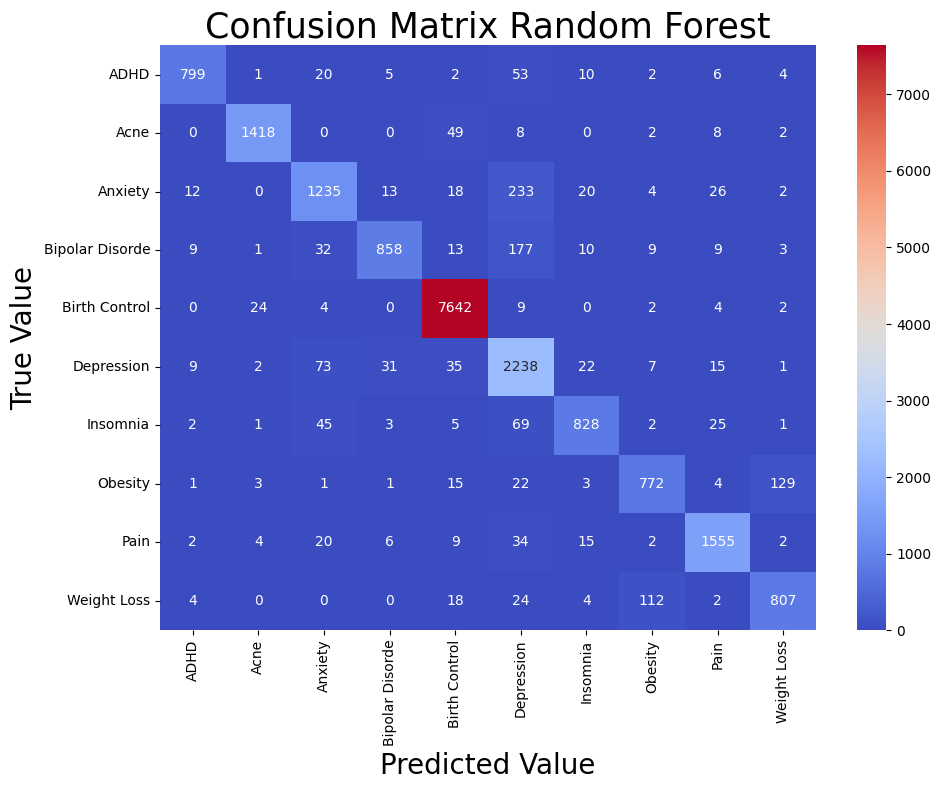

In [60]:
rf = RandomForestClassifier(n_estimators=100, random_state=0) # 100 n_estimators in order to fasten the process
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

joblib.dump(rf,"./Models/rf_w2v_model.pkl")

print(y_pred)
print(y_test)
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix Random Forest",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### XGBoost

In [61]:
le.inverse_transform([8]),y

(array(['Pain'], dtype=object), array([9, 9, 1, ..., 5, 9, 2]))

In [62]:
len(le.classes_),le.classes_,y_train,y_test

(10,
 array(['ADHD', 'Acne', 'Anxiety', 'Bipolar Disorde', 'Birth Control',
        'Depression', 'Insomnia', 'Obesity', 'Pain', 'Weight Loss'],
       dtype=object),
 array([0, 4, 3, ..., 6, 2, 4]),
 array([4, 2, 8, ..., 4, 4, 0]))

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]
Accuracy score: 0.9327931121802988

Classification report:
              precision    recall  f1-score   support

           0      0.951     0.932     0.942       902
           1      0.976     0.964     0.970      1487
           2      0.882     0.840     0.861      1563
           3      0.898     0.844     0.870      1121
           4      0.988     0.995     0.992      7687
           5      0.850     0.912     0.880      2433
           6      0.920     0.889     0.904       981
           7      0.836     0.796     0.816       951
           8      0.947     0.957     0.952      1649
           9      0.825     0.831     0.828       971

    accuracy                          0.933     19745
   macro avg      0.907     0.896     0.901     19745
weighted avg      0.933     0.933     0.933     19745




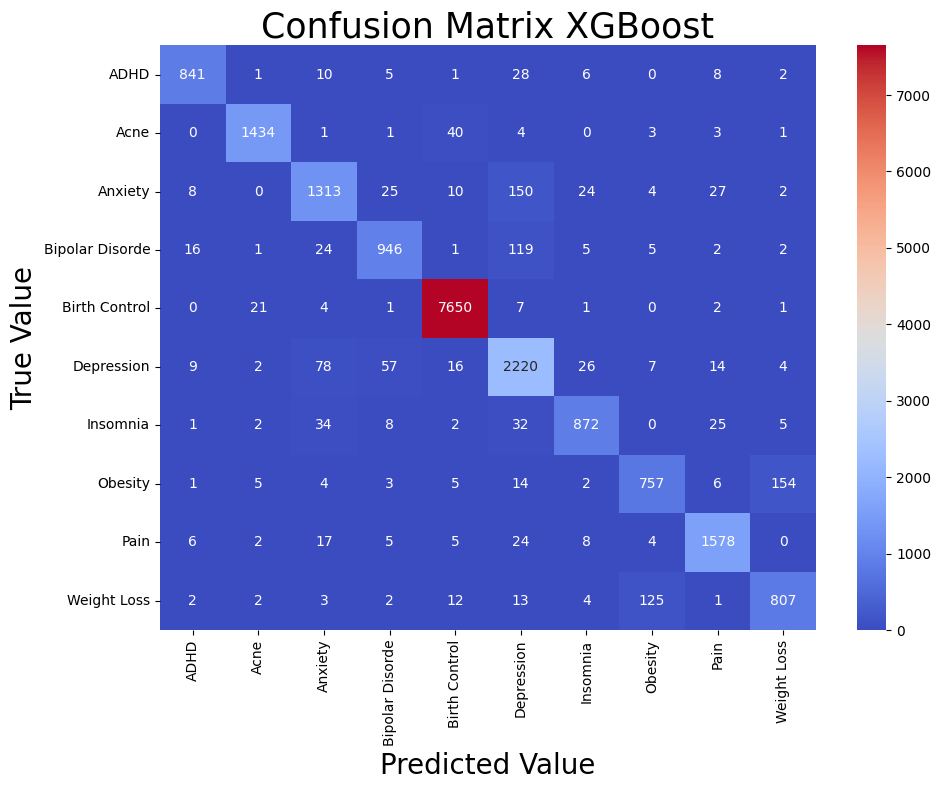

In [63]:
xgb = xgboost.XGBClassifier(n_estimators=1000, objective='multi:softmax')
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

joblib.dump(xgb,"./Models/xgb_w2v_model.pkl")

print(y_pred)
print(y_test)
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix XGBoost",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

In [64]:
xgb.get_params()

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 1000,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [65]:
# xgb.coef_ ## gblinear

In [66]:
pac.coef_

array([[-0.53927926,  0.08298583,  0.13745488, ...,  0.56904393,
         0.07796946, -0.14390978],
       [ 0.0246306 ,  0.55611494, -0.08972683, ...,  0.29739786,
        -0.2482339 , -0.43802098],
       [-0.05652491,  0.35222976, -0.60308896, ..., -0.69199269,
         0.52796499, -0.23243231],
       ...,
       [ 0.38955715,  0.23204752, -0.27020266, ...,  0.17540432,
        -0.1102523 ,  0.28458332],
       [-0.01157077,  0.24698897, -0.28041502, ...,  0.11030033,
        -0.42363325,  0.35461466],
       [-0.40299288, -0.26888839, -0.20012408, ...,  0.06667704,
        -0.1492869 ,  0.08403378]])

In [67]:
knn.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
xgb.feature_importances_.shape, xgb.feature_importances_

((250,),
 array([0.0016804 , 0.00076288, 0.00461406, 0.00124283, 0.00227749,
        0.00193528, 0.0013072 , 0.00447482, 0.00164764, 0.00089744,
        0.00189569, 0.00118688, 0.00086128, 0.00379858, 0.00223558,
        0.00379015, 0.00080658, 0.00236955, 0.00120923, 0.00448703,
        0.00195334, 0.00241237, 0.00671227, 0.00190737, 0.00147619,
        0.05745276, 0.00192153, 0.00230691, 0.00289237, 0.0010667 ,
        0.00071201, 0.00232893, 0.00162282, 0.00277784, 0.00080169,
        0.00169581, 0.00151869, 0.00199282, 0.00148202, 0.02182958,
        0.00149279, 0.00096104, 0.00129134, 0.001112  , 0.00123858,
        0.00173096, 0.00094839, 0.00188844, 0.00358395, 0.00156689,
        0.00365291, 0.0009213 , 0.00241633, 0.00386982, 0.00227128,
        0.00113873, 0.00573095, 0.00204621, 0.00505625, 0.00263978,
        0.00409144, 0.00277334, 0.00088825, 0.00123845, 0.0015473 ,
        0.01073508, 0.00208468, 0.00353661, 0.00113961, 0.004442  ,
        0.00130144, 0.00097979, 0.00475

In [2]:
import pandas as pd
import joblib
from gensim.models import Word2Vec
main_data = pd.read_csv('./drug review dataset drugs.com/DrugsComPatient_raw.csv')
main_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,4753,Belviq,Weight Loss,"""WARNING...... NEVER STOP THIS MEDICATION COLD...",1.0,"June 18, 2015",52
1,67134,Magnesium hydroxide,Constipation,"""Oh my word! This stuff saved my life. It took...",7.0,"April 10, 2016",21
2,6918,Aluminum chloride hexahydrate,Hyperhidrosis,"""It worked very well for the first 2 weeks wit...",6.0,"August 20, 2016",2
3,164803,Phentermine / topiramate,Weight Loss,"""I&#039;m a 5&#039;11 205lb size 12 former ath...",8.0,"November 27, 2016",24
4,177619,Duloxetine,Generalized Anxiety Disorde,"""I initially took Cymbalta for distonia, which...",10.0,"July 30, 2015",67


In [69]:
# Load LabelEncoder
le = joblib.load('./label_encoder.pkl')

# Load Word2Vec model
word2vec = Word2Vec.load('./Word Embedding/word2vec.model')

# Load the model
xgb = joblib.load('./Models/xgb_w2v_model.pkl')

In [70]:
from bs4 import BeautifulSoup
import re
import string
from nltk.corpus import stopwords

stopwords = stopwords.words("english")

punct = string.punctuation
punct = '!%&()*,./:;<=>@[\\]^`{|}~'

def clean_words(raw_review):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    # 2. Remove symbols
    review_text = re.sub(f"[{punct}]"," ", review_text)
    review_text = re.sub("[^0-9a-zA-Z #+-_$'\"]","", review_text)
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    # 4. Remove stopwords
    words = [w for w in words if w not in stopwords]
    # # 5. Lemmatize words
    # words = [lemmatizer.lemmatize(w) for w in words]
    # 6. Return the cleaned words
    return words

In [71]:
def get_averaged_vector(review):
    word_vec = []
    for word in review:
        if word in word2vec.wv:
            word_vec.append(word2vec.wv[word])
    if len(word_vec) == 0:
        return np.zeros(word2vec.vector_size)
    return sum(word_vec) / len(word_vec)

In [72]:
def extract_top_drugs(label):
    data_top = main_data[(main_data['rating']>=9) & (main_data['usefulCount']>=100)].sort_values(by=['rating','usefulCount'],ascending=[False, False])
    data_top.head()
    drug_list = data_top[data_top['condition']==label]['drugName'][:3].tolist()
    return drug_list

In [73]:
def predict_condition(text):
    words = clean_words(text)
    vector = get_averaged_vector(words)
    vector = vector.reshape(1,-1)
    pred = xgb.predict(vector)
    return le.inverse_transform(pred)[0]

In [74]:
sentences = ["I have situational depression, never dealt with it before. Wellbutrin had definitely helped get me out of bed each day. The &quot;situation&quot; is becoming better as well but I find my emotions aren&#039;t as out of whack. I cry less &amp; get angry less. I do feel it made me more anxious which I&#039;m already dealing with &amp; taking Buspirone for. I didn&#039;t experience many side effects BUT one that is hard to deal with but because it seems to make me get through each day a little better, I deal with it. It makes my throat feel closed, which is very annoying. I feel often like I can&#039;t breathe well &amp; that I can&#039;t swallow or that something is stuck in my throat. I&#039;ve not taken any other pills on several days to determine that it was the Wellbutrin that did it &amp; it is."]

In [75]:
prediction = predict_condition(sentences[0])

top_drugs = extract_top_drugs(prediction)

print("Condition:",prediction)
print("Top Drugs:")
for i, drug in enumerate(top_drugs):
    print(f"{i+1}. {drug}")

Condition: Depression
Top Drugs:
1. Sertraline
2. Zoloft
3. Viibryd


In [77]:
import pickle

obj = {'a': 1, 'b': 2, 'c': 3}

obj_string = pickle.dumps(obj)

recovered_obj = pickle.loads(obj_string)

print(recovered_obj)

{'a': 1, 'b': 2, 'c': 3}


In [83]:
svc.coef_.shape

(45, 250)

In [82]:
lr.coef_.shape

(10, 250)

In [93]:
svc.decision_function(x_test).shape

(19745, 10)

In [95]:
svc.__class__.__name__

'RandomForestClassifier'